# **Predictive Modeling for Gold ETFs: Analyzing Market Drivers and Trends**

Collaborators : Vikas Patel (UID: 120988417) and Varun Parashar (UID : 121302922)

# **Problem Definition**

This project focuses on developing a predictive model for the **"Price_GLD ETF"**, an important financial indicator reflecting the performance of gold-backed exchange-traded funds. By accurately predicting the price of GLD ETFs, the project aims to provide actionable insights for investors and stakeholders, assisting in portfolio management, risk assessment, and strategic planning.

---

## **Objectives**

1. **Develop a Predictive Model**  
   Build a machine learning model to predict the future price of GLD ETFs based on historical data and other financial indicators.
   
2. **Understand Feature Relationships**  
   Analyze how GLD ETF prices are influenced by other factors like stock indices, currency exchange rates, and commodity prices.
   
3. **Enable Strategic Insights**  
   Deliver insights to stakeholders by identifying the key drivers of GLD ETF price changes through the predictive model.

---

## **Constraints**

1. **Data Quality and Availability**  
   Ensure the dataset is clean, complete, and free of significant anomalies to maintain prediction accuracy.

2. **Feature Correlation**  
   Handle potential multicollinearity among highly correlated features through preprocessing steps.

3. **Model Interpretability**  
   Prioritize a balance between model accuracy and interpretability to build stakeholder trust in the predictions.

---

## **Success Criteria**

1. **Model Performance**  
   Achieve high prediction accuracy (e.g., R² > 0.85 ) on the test dataset.

2. **Actionable Insights**  
   Provide stakeholders with a clear understanding of the key drivers influencing GLD ETF prices.



### Why is this Important?

1. **Market Analysis**:
   - Predictive modeling helps identify key market drivers such as stock indices, currency exchange rates, and geopolitical events that impact Gold ETF prices. This provides deeper insights into their value.

2. **Risk Management**:
   - By forecasting price movements, models help minimize exposure to market volatility and inflation risks. This enables investors to make timely adjustments to their portfolios.

3. **Strategic Decision-Making**:
   - Accurate predictions empower investors and portfolio managers to refine investment strategies, optimize returns, and align portfolios with financial goals.

4. **Stakeholder Confidence**:
   - A reliable predictive model enhances confidence among investors, advisors, and analysts by providing data-driven insights to navigate market fluctuations.

5. **Regulatory Compliance**:
   - Predictive models help meet regulatory standards by monitoring ETF performance and aligning investment strategies with guidelines.


### **Tutorial Overview: Data Science Lifecycle**

Throughout this tutorial, we will go through the Data Science Lifecycle as follows:

### 1. **[Data Collection](#data-collection)**
   - Overview of how to collect relevant data from different sources.
   - Techniques for ensuring data quality and consistency.

### 2. **[Data Processing](#data-processing)**
   - Cleaning and preprocessing steps.
   - Data transformation and normalization techniques.

### 3. **[Exploratory Analysis & Data Visualization](#exploratory-analysis)**
   - Techniques for understanding data distribution and patterns.
   - Visualizations to communicate insights effectively.

### 4. **[Model: Building, Training & Hypothesis Testing](#model-analysis)**
   - Building, training, and validating machine learning models.
   - Hypothesis testing to validate assumptions and conclusions.

### 5. **[Interpretation: Insight & Policy Decision](#interpretation)**
   - Extracting meaningful insights from the model results.
   - Making informed policy decisions based on data analysis.

In [1]:
# IMPORTING ALL THE LIBRARY
import pandas as pd
import numpy as np
import math
import datetime as dt
import requests
import seaborn as sns
import statsmodels.api as sm
import missingno as msno
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
import glob
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

2024-12-13 17:37:36.659209: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# **DATA COLLECTION**

In a data science project focused on finance, accurate data collection is crucial. The quality of the insights and models that can be derived heavily depends on the accuracy, consistency, and relevance of the data. Investing.com is a reliable source for financial data, offering real-time market information, historical price data, economic indicators, and news that are essential for informed decision-making. By using investing.com, I can access comprehensive datasets that include stock prices, financial statements, economic indicators, and market sentiment, which will enable me to perform in-depth analysis, create predictive models, and ultimately provide valuable insights into market trends and investment strategies. Accurate data is key to identifying patterns, forecasting market movements, and making data-driven investment decisions.

# Links
- **Gold ETF:**
  - Price_GLD ETF and Vol_GLD ETF: [https://www.investing.com/etfs/spdr-gold-trust-historical-data](https://www.investing.com/etfs/spdr-gold-trust-historical-data)
  - SLV ETF: [https://www.investing.com/etfs/ishares-silver-trust-historical-data](https://www.investing.com/etfs/ishares-silver-trust-historical-data)

- **Oil prices:**
  - S&P GSCI Crude Oil Index: [https://www.investing.com/indices/s-p-gsci-crude-oil-er-historical-data](https://www.investing.com/indices/s-p-gsci-crude-oil-er-historical-data)
  - USO ETF: [https://www.investing.com/etfs/united-states-oil-fund-historical-data](https://www.investing.com/etfs/united-states-oil-fund-historical-data)

- **Equity Indices:**
  - Price_DAX: [https://www.investing.com/indices/germany-30-historical-data](https://www.investing.com/indices/germany-30-historical-data)
  - Price_Nikkei 225: [https://www.investing.com/indices/japan-ni225-historical-data](https://www.investing.com/indices/japan-ni225-historical-data)
  - Price_Shanghai Composite: [https://www.investing.com/indices/shanghai-composite-historical-data](https://www.investing.com/indices/shanghai-composite-historical-data)
  - Price_S&P 500: [https://www.investing.com/indices/us-spx-500-historical-data](https://www.investing.com/indices/us-spx-500-historical-data)

- **Currency Exchange Rates:**
  - Price_USD_EUR: [https://www.investing.com/currencies/eur-usd-historical-data](https://www.investing.com/currencies/eur-usd-historical-data)
  - Price_USD_GBP: [https://www.investing.com/currencies/usd-gbp-historical-data](https://www.investing.com/currencies/usd-gbp-historical-data)
  - Price_USD_JPY: [https://www.investing.com/currencies/usd-jpy-historical-data](https://www.investing.com/currencies/usd-jpy-historical-data)

***I have gathered all the data from the specified sources provided in the links attached above and consolidated it into a single file using the code provided below.***

In [ ]:
# Path to your CSV files
path = "/data science/"  # Replace with your actual path
csv_files = glob.glob(path + "*.csv")

# Initialize an empty list to store DataFrames
dfs = []

# Step 1: Load and Stack Files Vertically (only 'Date' and 'Price')
for file in csv_files:
    df = pd.read_csv(file, parse_dates=["Date"], usecols=["Date", "Price"])
    dfs.append(df)

# Concatenate vertically to create stacked_df
stacked_df = pd.concat(dfs, ignore_index=True)

# Remove duplicate dates and keep one
stacked_df.drop_duplicates(subset=["Date"], inplace=True)

# Get all unique dates
unique_dates = stacked_df["Date"].drop_duplicates().sort_values()

# Create a base DataFrame with unique dates
base_df = pd.DataFrame({"Date": unique_dates}).reset_index(drop=True)

# Step 2: Combine Each File Horizontally with Base Data
for file in csv_files:
    df = pd.read_csv(file, parse_dates=["Date"], usecols=["Date", "Price"])  # Use usecols here as well
    # Rename 'Price' column to avoid conflicts during merge
    df.rename(columns={"Price": f"Price_{file.split('/')[-1].split('.')[0]}"}, inplace=True)
    base_df = pd.merge(base_df, df, on="Date", how="left")

# Display the final combined data
print("Final Combined Data:")
print(base_df.head())

# Save the combined data to a CSV file if needed
base_df.to_csv("combined_data.csv", index=False)

In [ ]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5428 entries, 0 to 5427
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype         
---  ------                                                        --------------  -----         
 0   Date                                                          5428 non-null   datetime64[ns]
 1   Price_Shanghai Composite Historical Data                      4993 non-null   object        
 2   Price_DAX Historical Data                                     5001 non-null   object        
 3   Price_USD_JPY Historical Data                                 5000 non-null   float64       
 4   Price_GLD ETF Stock Price History                             5000 non-null   float64       
 5   Price_S&P GSCI Crude Oil Index Excess Return Historical Data  5001 non-null   object        
 6   Price_USD_EUR Historical Data                                 5001 non-null   float64       
 7   Price_

In [ ]:
df = base_df.copy()

***Working of the Missing values.***

In [ ]:
def missing_value_table(df):
    mis_val = df.isnull().sum()

    mis_val_percent = 100*mis_val/len(df)
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
    columns={0:'Missing Values', 1:'% of Total Values'})
    #sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] !=0].sort_values(
    '% of Total Values', ascending=False).round(1)
    # Print some summary information
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
    return mis_val_table_ren_columns

In [ ]:
missing_table = missing_value_table(df)
missing_table

Your selected dataframe has 13 columns.
There are 12 columns that have missing values.


,Missing Values,% of Total Values
Price_S&P GSCI Agriculture Index Spot Historical Data,4789,88.2
Price_SLV ETF Stock Price History,718,13.2
Price_USO ETF Stock Price History,706,13.0
Price_Shanghai Composite Historical Data,435,8.0
Price_USD_JPY Historical Data,428,7.9
Price_GLD ETF Stock Price History,428,7.9
Price_Nikkei 225 Historical Data,428,7.9
Price_DAX Historical Data,427,7.9
Price_S&P GSCI Crude Oil Index Excess Return Historical Data,427,7.9
Price_USD_EUR Historical Data,427,7.9


<Axes: >

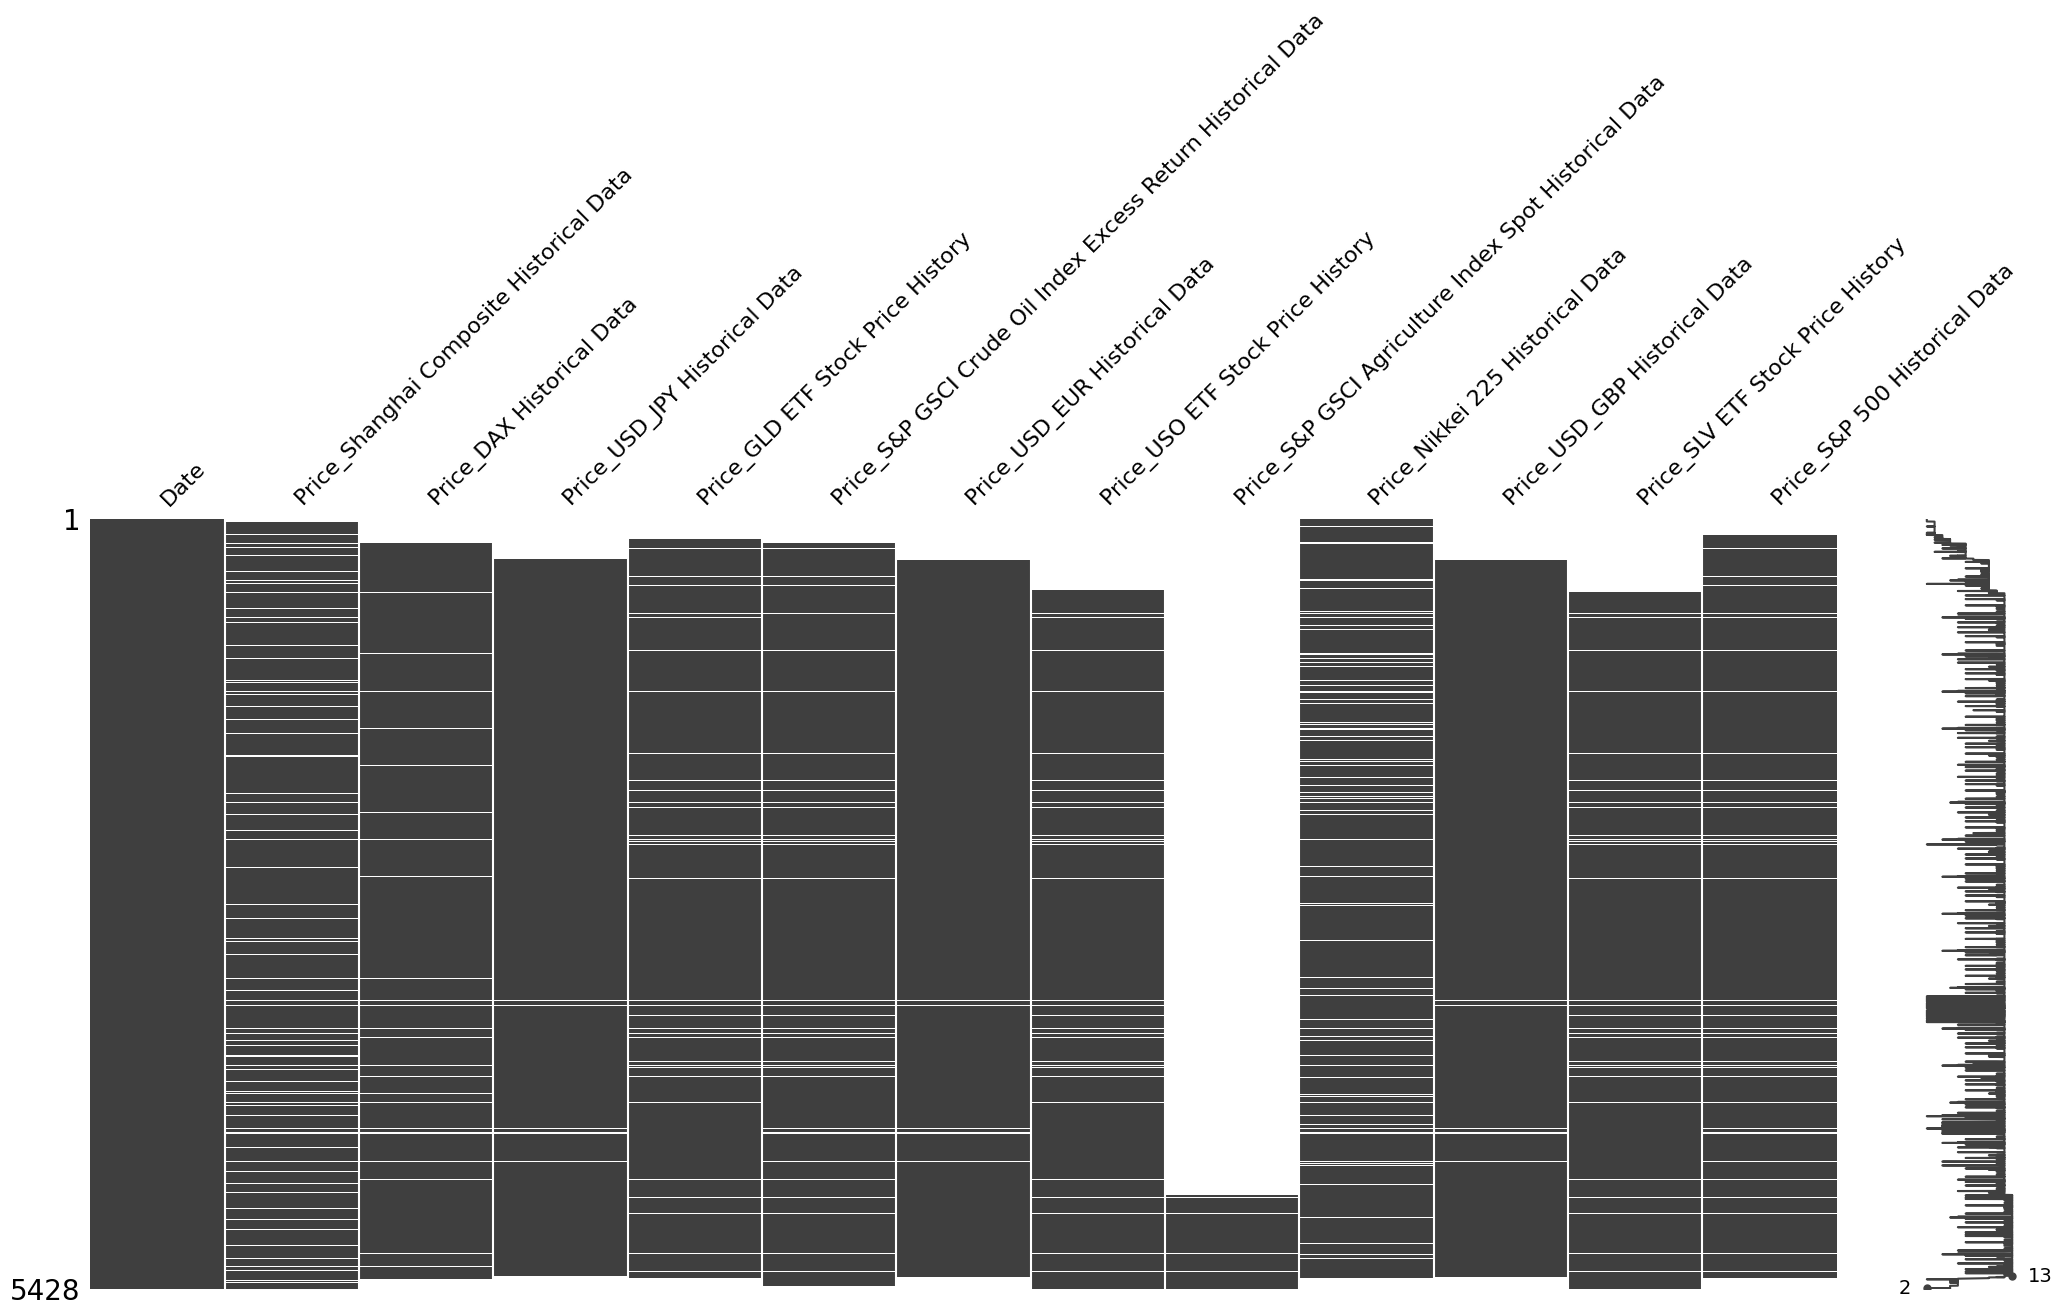

In [ ]:
msno.matrix(df)

***While gathering the data, we encountered the column "Price_S&P GSCI Agriculture Index Spot Historical Data", which contained missing values that were not manageable. Consequently, we decided to remove this column from the dataset.***

<a name="data-processing"></a>
## **DATA PROCESSING**

The collected data was exported to a CSV file for further analysis.  

## Data Cleaning and Transformation  
1. **Understanding the Data**  
   - Reviewed the dataset to identify patterns, usable tables, and inconsistencies.  

2. **Handling Missing Values**  
   - Removed rows with significant blank values where applicable.  
   - Imputed missing values by calculating the average of the five values above and below the missing entry and encoding this value into the dataset.  

3. **Date Range Selection**  
   - Filtered the dataset to include only the date range relevant for the analysis.  


In [ ]:
# prompt: "Final_finance_data.csv" read this fine

df = pd.read_csv("Final_finance_data.csv")

In [ ]:
df.shape

(5045, 14)

In [ ]:
df.head()

,Date,Price_GLD ETF,Vol_GLD ETF,Price_DAX,Price_S&P GSCI Agriculture Index,Price_USD_EUR,Price_Nikkei 225,Price_USD_GBP,Price_Shanghai Composite,Price_S&P 500,Price_USD_JPY,S&P GSCI Crude Oil Index,USO ETF,SLV ETF
0,2024-07-30,222.52,4.94M,"18,411.18",344.09,0.9246,"38,525.95",0.7790,"2,879.30","5,436.44",152.76,144.19,74.46,25.83
1,2024-07-29,220.32,4.67M,"18,320.67",346.39,0.9240,"38,468.63",0.7774,"2,891.85","5,463.54",154.01,146.27,75.19,25.44
2,2024-07-26,220.63,6.33M,"18,417.55",344.78,0.9208,"37,667.41",0.7769,"2,890.90","5,459.10",153.72,148.88,76.11,25.48
3,2024-07-25,218.33,9.78M,"18,298.72",352.28,0.9218,"37,869.51",0.7781,"2,886.74","5,399.22",153.93,151.04,77.46,25.41
4,2024-07-24,221.80,6.84M,"18,387.46",351.08,0.9223,"39,154.85",0.7747,"2,901.95","5,427.13",153.87,149.70,76.81,26.43


In [ ]:
df.columns

Index(['Date', 'Price_GLD ETF', 'Vol_GLD ETF', 'Price_DAX',
       'Price_S&P GSCI Agriculture Index', 'Price_USD_EUR', 'Price_Nikkei 225',
       'Price_USD_GBP', 'Price_Shanghai Composite', 'Price_S&P 500',
       'Price_USD_JPY', 'S&P GSCI Crude Oil Index', 'USO ETF', 'SLV ETF'],
      dtype='object')

## **Understanding the Data**

## Dataset Columns:
- **Date**: Represents the time dimension of the dataset, indicating when the data was recorded.

- **Price_GLD ETF**: The price of the Gold ETF, which tracks trends in gold investments.

- **Vol_GLD ETF**: The trading volume of the Gold ETF, reflecting market activity.

- **Price_DAX**: The price of the DAX index, representing 30 major German companies listed on the Frankfurt Stock Exchange.

- **Price_S&P GSCI Agriculture Index**: The price of the S&P GSCI Agriculture Index, tracking the performance of agricultural commodities.

- **Price_USD_EUR**: The exchange rate between the US Dollar (USD) and Euro (EUR).

- **Price_Nikkei 225**: The price of the Nikkei 225 index, representing 225 blue-chip companies on the Tokyo Stock Exchange.

- **Price_USD_GBP**: The exchange rate between the US Dollar (USD) and British Pound (GBP).

- **Price_Shanghai Composite**: The price of the Shanghai Composite index, representing all A-shares and B-shares listed on the Shanghai Stock Exchange.

- **Price_S&P 500**: The price of the S&P 500 index, a benchmark of 500 large companies listed on stock exchanges in the United States.

- **Price_USD_JPY**: The exchange rate between the US Dollar (USD) and Japanese Yen (JPY).

- **S&P GSCI Crude Oil Index**: The price index tracking the performance of crude oil.

- **USO ETF**: The price of the United States Oil Fund ETF, representing investments in oil futures.

- **SLV ETF**: The price of the iShares Silver Trust ETF, tracking the performance of silver.


# Key Characteristics:

- **Multi-dimensional**: Includes financial market indexes, commodity prices, and currency exchange rates, providing a comprehensive view of global market dynamics.

- **Temporal Aspect**: The **Date** column allows for trend and time-series analysis.

- **Diversity**: Covers a variety of market indicators such as ETFs, stock indexes, and exchange rates, making it useful for cross-market correlation studies and investment analyses.



In [ ]:
columns_to_drop = ['Price_S&P GSCI Agriculture Index'] # Replace with actual column name if different

df = df.drop(columns=columns_to_drop)


In [ ]:
df.shape

(5045, 13)

In [ ]:

df = df.dropna()
df.shape

(4201, 13)

In [ ]:
df.isna().sum()

,0
Date,0
Price_GLD ETF,0
Vol_GLD ETF,0
Price_DAX,0
Price_USD_EUR,0
Price_Nikkei 225,0
Price_USD_GBP,0
Price_Shanghai Composite,0
Price_S&P 500,0
Price_USD_JPY,0


***Till this point the data has been cleaned, with all null values removed, ensuring a clear and organized dataset ready for analysis.***

<a name="exploratory-analysis"></a>
## **EXPLORATORY ANALYSIS  & DATA VISUALIZATION**



In [ ]:
df = pd.read_csv("exported_data.csv")


In [ ]:
eda_data = df.copy()
eda_data.head()

,Date,Price_GLD ETF,Vol_GLD ETF,Price_DAX,Price_USD_EUR,Price_Nikkei 225,Price_USD_GBP,Price_Shanghai Composite,Price_S&P 500,Price_USD_JPY,S&P GSCI Crude Oil Index,USO ETF,SLV ETF
0,7/30/2024,222.52,4940000,18411.18,0.9246,38525.95,0.7790,2879.30,5436.44,152.76,144.19,74.46,25.83
1,7/29/2024,220.32,4670000,18320.67,0.9240,38468.63,0.7774,2891.85,5463.54,154.01,146.27,75.19,25.44
2,7/26/2024,220.63,6330000,18417.55,0.9208,37667.41,0.7769,2890.90,5459.10,153.72,148.88,76.11,25.48
3,7/25/2024,218.33,9780000,18298.72,0.9218,37869.51,0.7781,2886.74,5399.22,153.93,151.04,77.46,25.41
4,7/24/2024,221.80,6840000,18387.46,0.9223,39154.85,0.7747,2901.95,5427.13,153.87,149.70,76.81,26.43


In [ ]:
# prompt: eda_data.describe() and make the data appear till 2 decimal places

pd.options.display.float_format = "{:.2f}".format
eda_data.describe()

,Price_GLD ETF,Vol_GLD ETF,Price_DAX,Price_USD_EUR,Price_Nikkei 225,Price_USD_GBP,Price_Shanghai Composite,Price_S&P 500,Price_USD_JPY,S&P GSCI Crude Oil Index,USO ETF,SLV ETF
count,4201.00,4201.00,4201.00,4201.00,4201.00,4201.00,4201.00,4201.00,4201.00,4201.00,4201.00,4201.00
mean,127.26,9658147.04,9948.22,0.82,18369.35,0.68,2881.43,2307.18,108.88,434.96,227.77,18.94
std,39.31,6721601.21,3666.89,0.09,7473.18,0.10,762.43,1189.92,17.56,359.45,180.93,6.28
min,41.89,473500.00,3666.41,0.63,7054.98,0.47,1011.50,676.50,75.79,26.95,17.04,8.85
25%,106.86,5440000.00,6617.75,0.75,12439.48,0.61,2373.31,1321.90,99.09,155.11,80.41,14.41
50%,123.68,7990000.00,9734.33,0.83,17108.70,0.66,2966.21,1990.20,109.37,298.08,164.16,17.07
75%,161.67,11780000.00,12733.41,0.90,22614.69,0.77,3268.56,2948.50,117.06,550.43,306.72,22.02
max,228.29,93800000.00,18869.36,1.04,42224.02,0.94,6092.06,5667.20,161.68,1818.37,939.84,47.26


<ipython-input-25-402f3064192f>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Vol_GLD ETF'], shade=True)


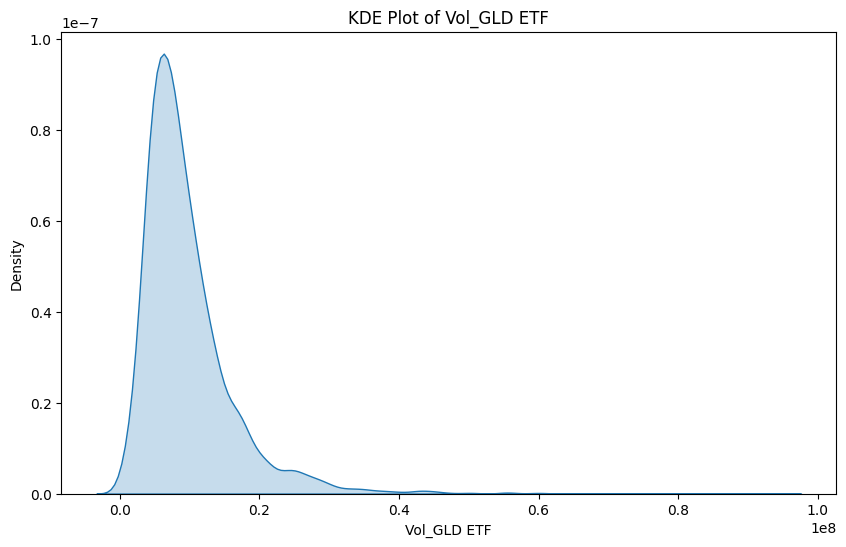

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Vol_GLD ETF'], shade=True)
plt.title('KDE Plot of Vol_GLD ETF')
plt.xlabel('Vol_GLD ETF')
plt.ylabel('Density')
plt.show()

## Graph Description
The graph illustrates the distribution of the **Vol_GLD ETF** variable.

**Vol_GLD ETF**: This likely represents the volatility of the SPDR Gold Shares ETF (GLD). Volatility is a measure of how much the price of an asset swings up and down over a certain period.

**Distribution Shape**: The skewed distribution suggests that:
- There are many days or periods where the volatility of GLD was relatively low.
- There were fewer instances of high volatility in GLD.

**Implications**: This distribution might suggest that investors in GLD could generally expect lower volatility compared to some other assets. However, there’s a risk of occasional periods of higher volatility.


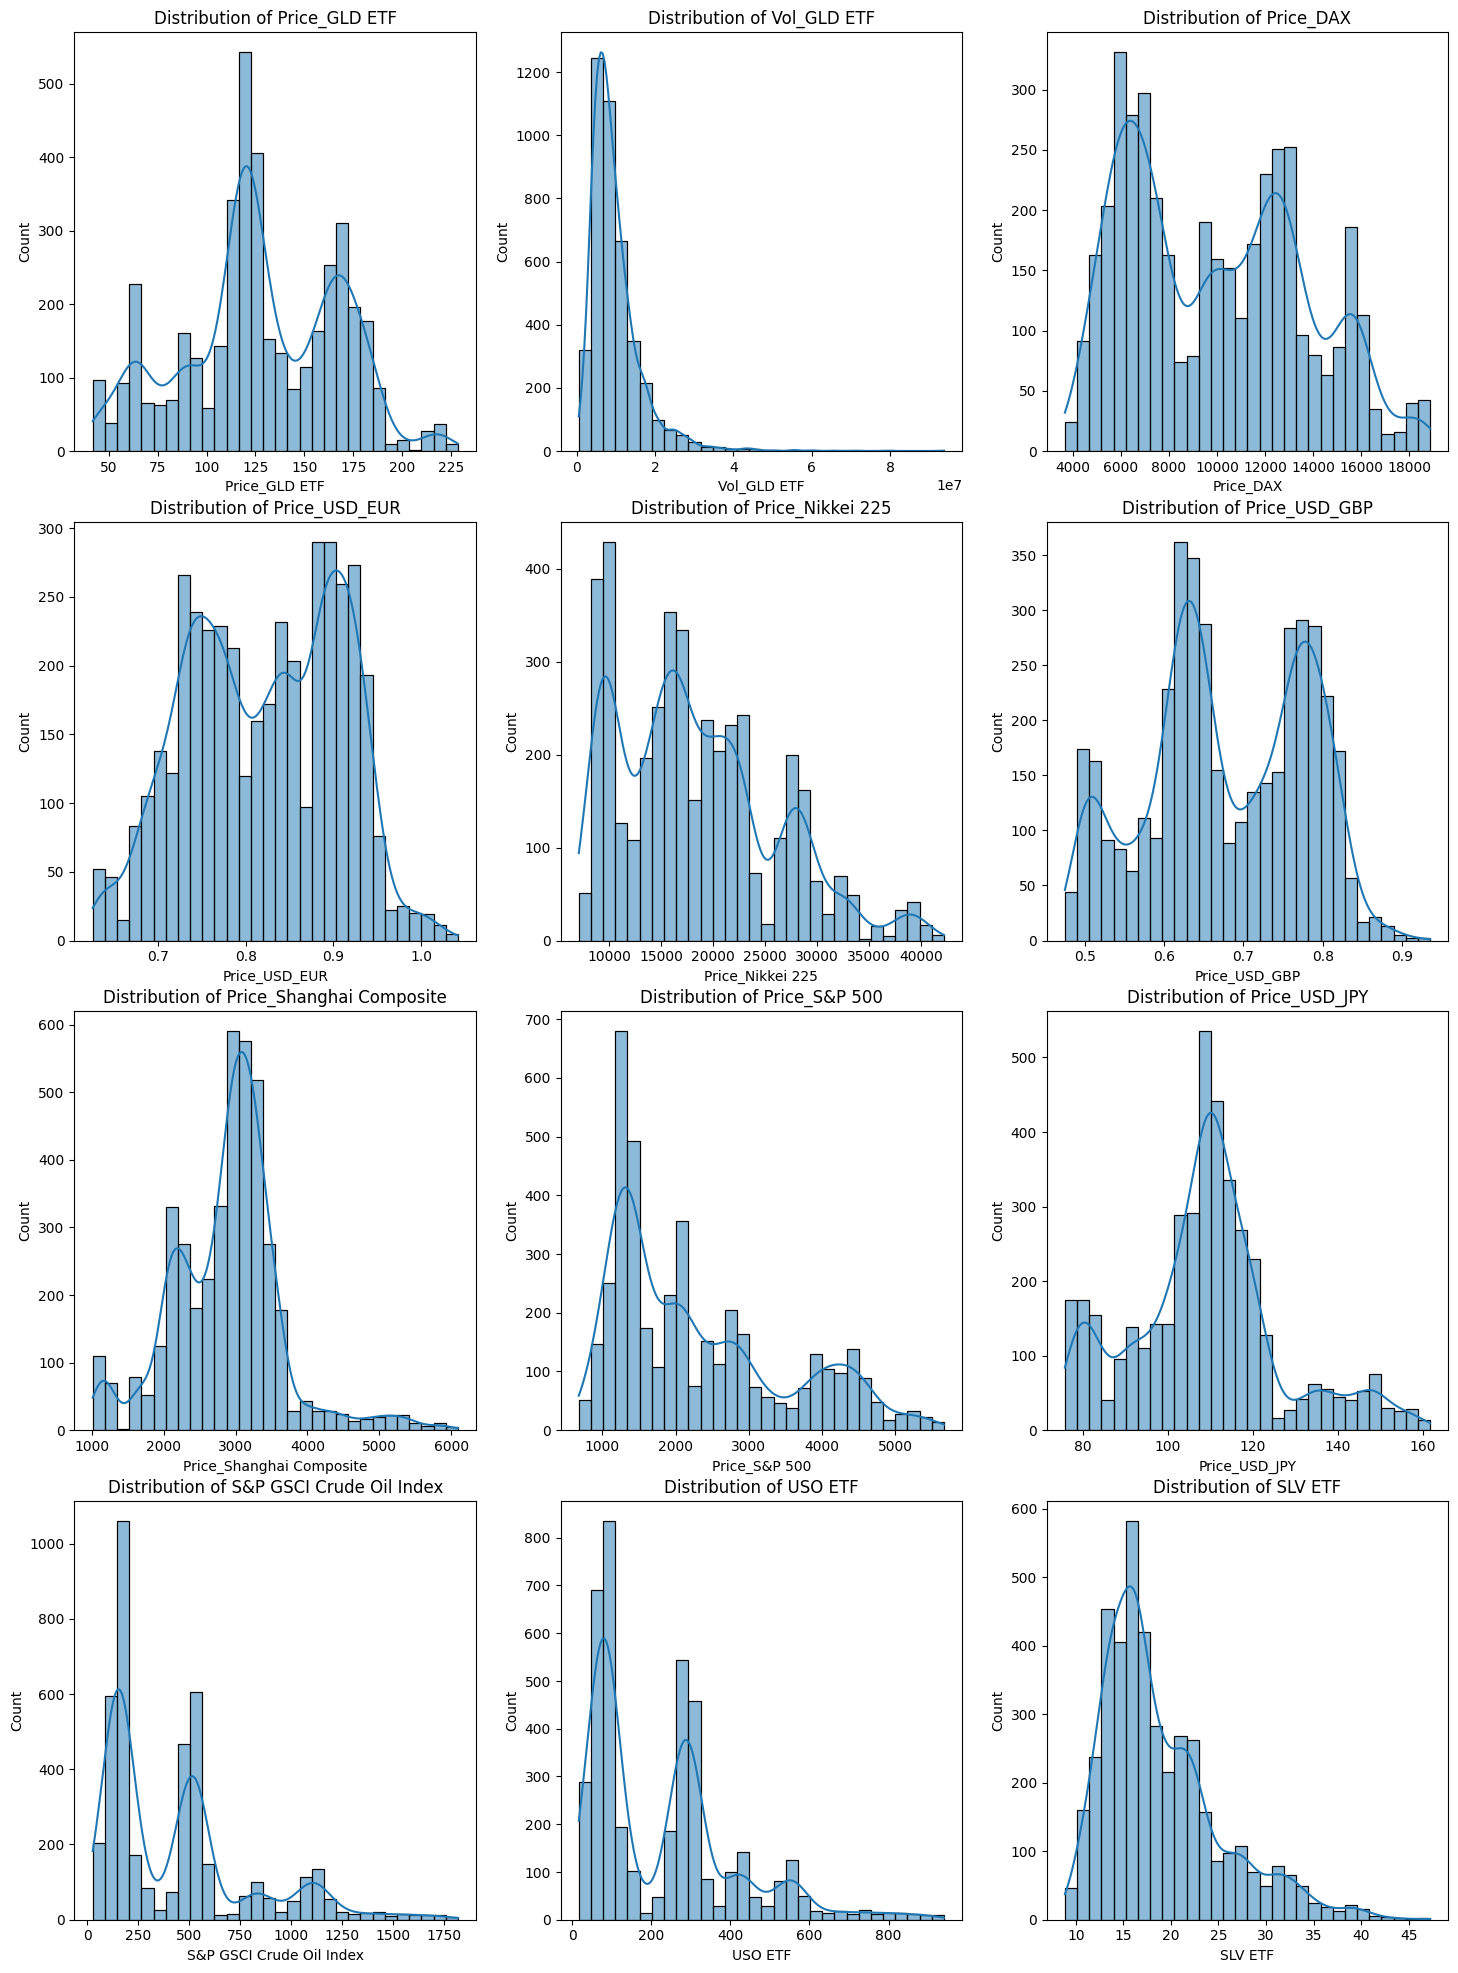

In [ ]:
# Selecting only numeric columns
numeric_columns = eda_data.select_dtypes(include=['int64', 'float64']).columns

# Determining the layout for subplots
num_cols = 3
num_plots = len(numeric_columns)
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the required number of rows

# Creating a figure with the necessary subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.tight_layout(pad=3.0)

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Plotting histograms only for numeric columns
for i, col in enumerate(numeric_columns):
    sns.histplot(eda_data[col], bins=30, kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')
    axs[i].set_xlabel(col)

# Removing unused subplots
for j in range(num_plots, len(axs)):
    fig.delaxes(axs[j])

plt.show()


I am only describing for one graph as for GLD ETF as we are predicting that parameter.

## Observations:

- **Shape**: The distribution is skewed to the right, indicating that a majority of the observations have lower prices. There is a long tail towards higher prices, suggesting the presence of some high-priced observations.

- **Central Tendency**: The peak of the distribution appears to be around the 125 mark on the x-axis. This suggests that the most frequent price range for the GLD ETF is around 125.

- **Spread**: The distribution is relatively wide, indicating that there is a considerable range of prices for the GLD ETF.


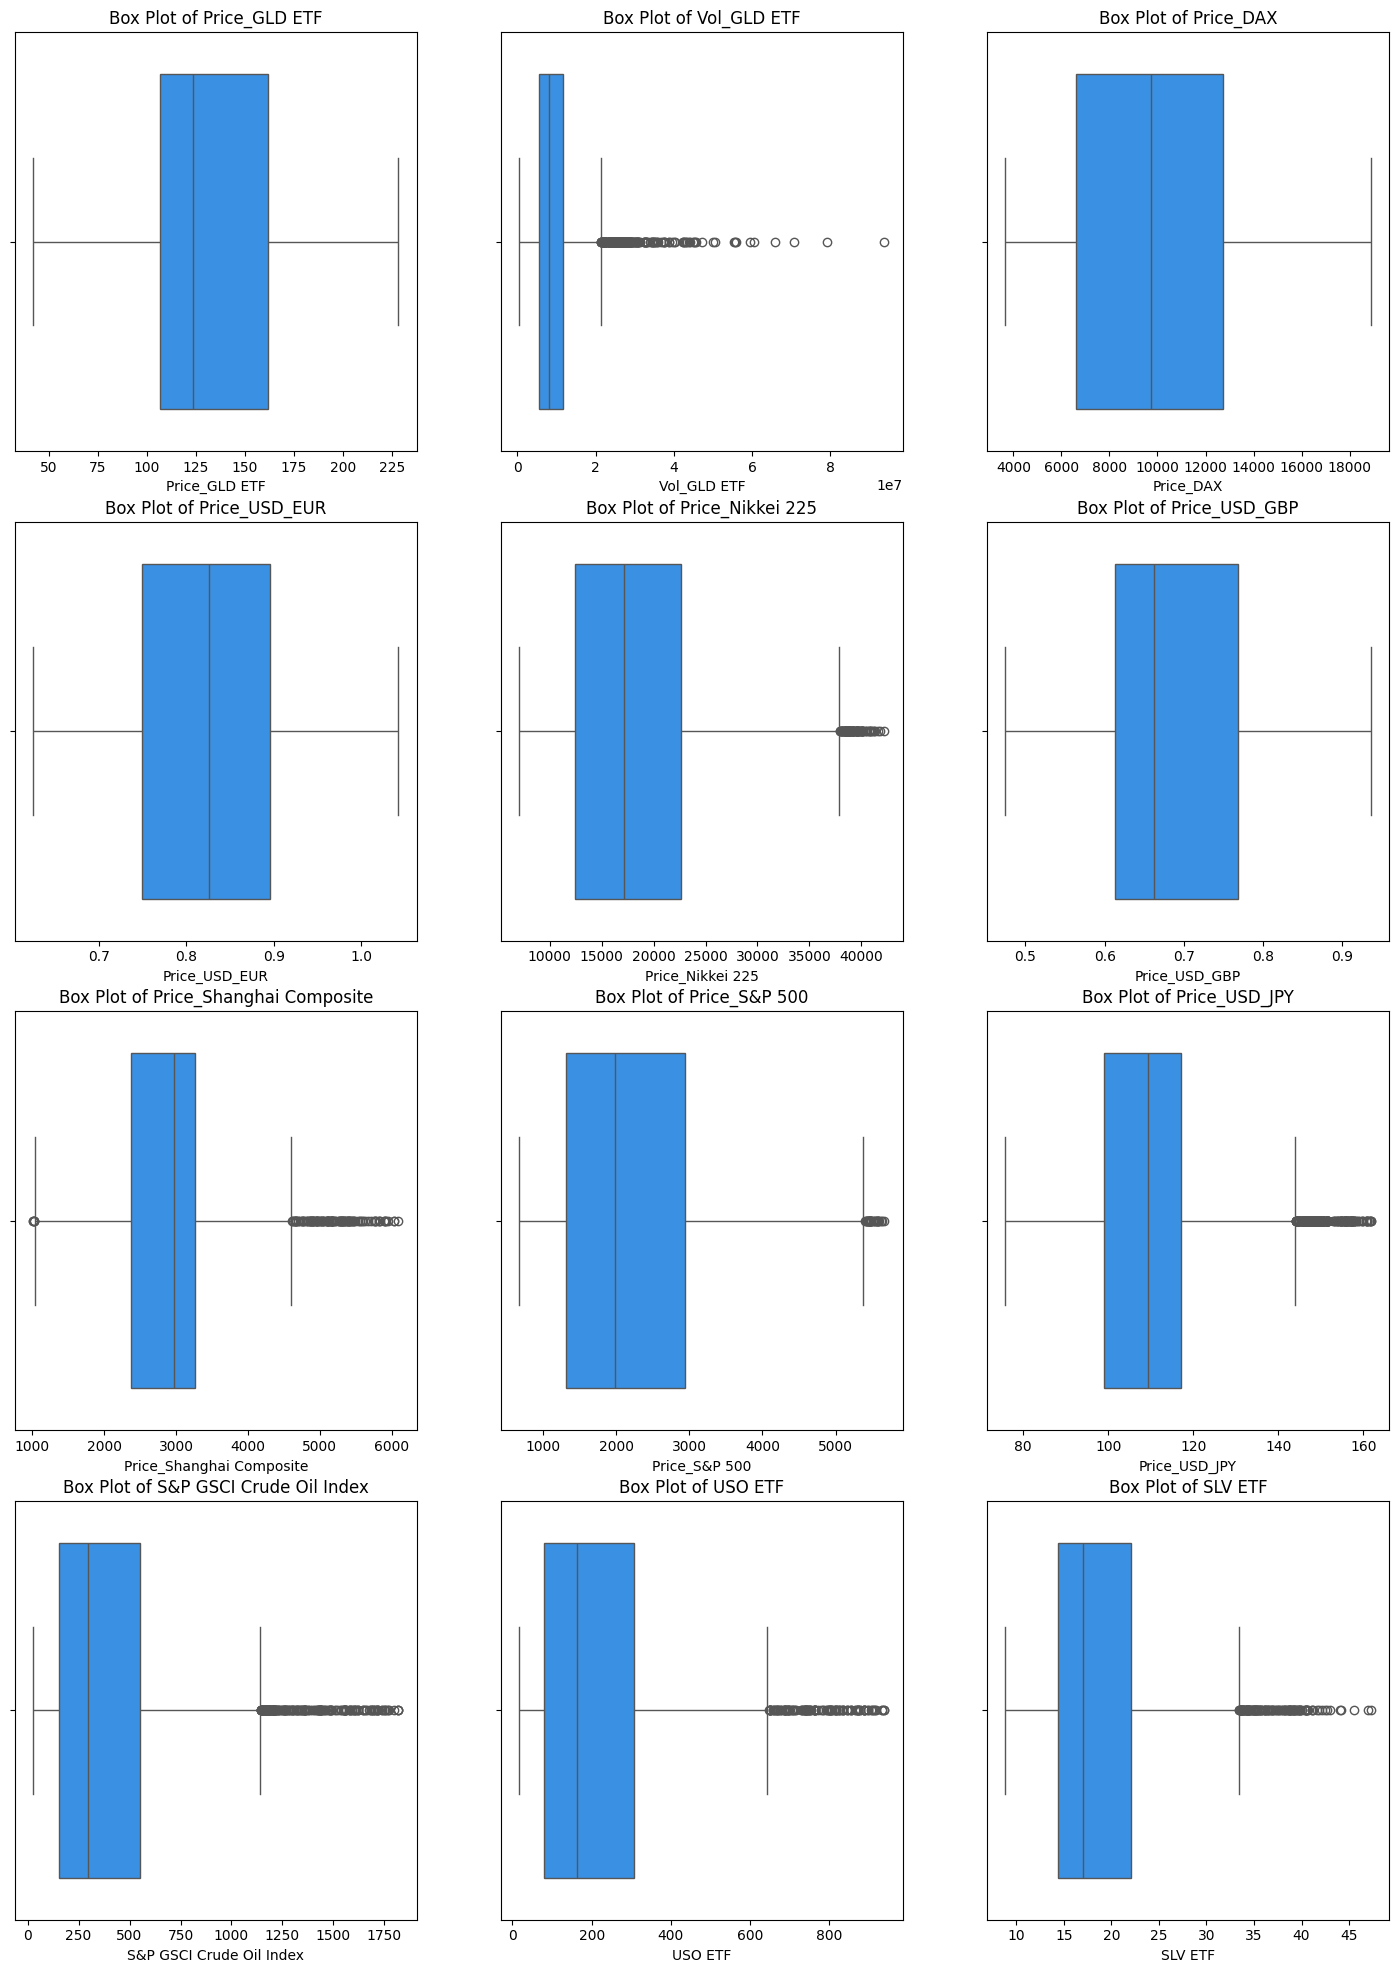

In [ ]:
# Determine the layout for subplots
num_cols = 3
num_plots = len(numeric_columns)
num_rows = (num_plots + num_cols - 1) // num_cols  # Calculate the required number of rows

# Define the deep pink color
deep_pink_color = "#1E90FF"  # Hex code for deep pink

# Create a figure with the necessary subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5))
fig.tight_layout(pad=3.0)

# Flatten the axes array for easier indexing
axs = axs.flatten()

# Plot box plots for numeric columns
for i, col in enumerate(numeric_columns):
    sns.boxplot(x=eda_data[col], ax=axs[i], color=deep_pink_color)
    axs[i].set_title(f'Box Plot of {col}', fontsize=12)
    axs[i].set_xlabel(col, fontsize=10)

# Remove unused subplots
for j in range(num_plots, len(axs)):
    fig.delaxes(axs[j])

plt.show()


# Interpretation:

The box plot visualizes the distribution of the **Price_GLD ETF**.

## Key Components of the Box Plot:
- **Box**: Represents the interquartile range (IQR), containing the middle 50% of the data. The bottom of the box is the first quartile (Q1), and the top of the box is the third quartile (Q3).
- **Line within the Box**: Represents the median (Q2), dividing the data into two equal halves.
- **Whiskers**: Extend from the box to the minimum and maximum values within a certain range (usually 1.5 times the IQR).
- **Outliers**: Data points that fall outside the whiskers are considered outliers and are typically plotted individually as dots.

## Observations:
- **Median**: The median price appears to be around 125.
- **IQR**: The IQR is relatively narrow, suggesting that the middle 50% of the prices are clustered within a tight range.
- **Outliers**: There appear to be a few outliers on the higher end of the price range.
- **Skewness**: The box is slightly skewed to the right, indicating that the distribution of prices might be slightly skewed to the right.

## Inferences:
- **Price Range**: The box plot gives a good overview of the typical price range for the GLD ETF.
- **Outliers**: The presence of outliers suggests that there might have been some unusual price movements or events during the period covered by the data.
- **Skewness**: The slight rightward skew suggests that there might be a few instances of higher prices compared to the majority of observations.


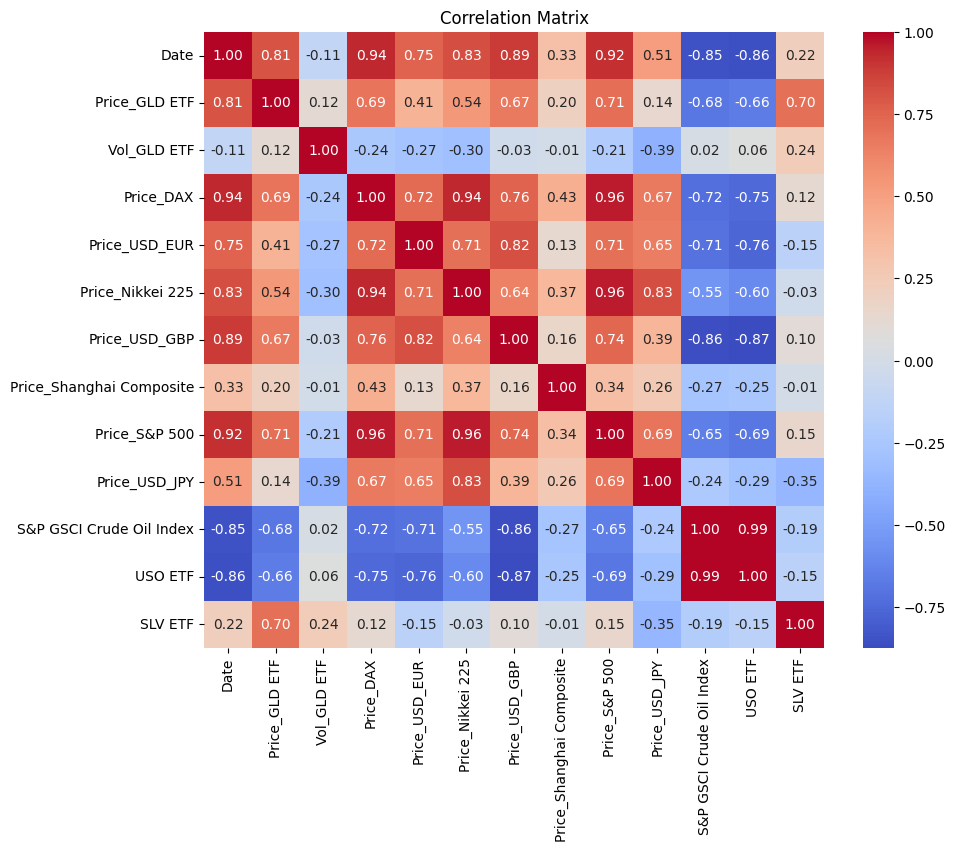

In [ ]:
# Computing the correlation matrix
correlation_matrix = eda_data.corr()

# Heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Correlation Matrix Analysis

The graph you provided is a **Correlation Matrix**. It shows the correlation between different variables (in this case, financial instruments and indices).

## How to Read the Matrix:
- Each cell represents the correlation between two variables.
- Values range from -1 to 1:
  - **1**: Perfect positive correlation (when one variable increases, the other increases proportionally).
  - **-1**: Perfect negative correlation (when one variable increases, the other decreases proportionally).
  - **0**: No correlation.

## Observations from the Matrix:
### Strong Positive Correlations:
- **Price_GLD ETF** and **Price_DAX** have a strong positive correlation (**0.69**), indicating that their prices tend to move in the same direction.
- **Price_USD_EUR** and **Price_USD_GBP** are highly correlated (**0.82**), which is expected as both are exchange rates against the US Dollar.
- **Price_S&P 500** and **Price_Nikkei 225** show a strong positive correlation (**0.96**).

### Strong Negative Correlations:
- **Price_DAX** and **S&P GSCI Crude Oil Index** have a strong negative correlation (**-0.72**), suggesting that when the price of crude oil goes up, the DAX index tends to go down.
- **Price_USD_JPY** and **S&P GSCI Crude Oil Index** also show a strong negative correlation (**-0.24**).

### Other Notable Correlations:
- **Price_GLD ETF** and **Vol_GLD ETF** have a weak positive correlation (**0.12**), indicating that when the price of gold increases, its volatility may slightly increase as well.
- **Price_USD_JPY** and **Price_Nikkei 225** have a moderate positive correlation (**0.83**), which is logical as both are related to the Japanese economy.


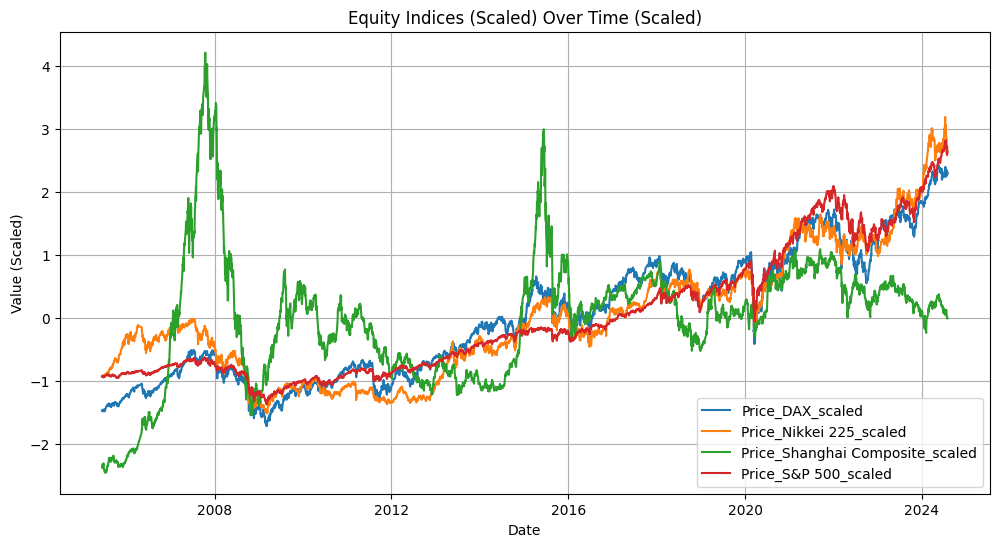

In [35]:

# Ensured the Date column is in datetime format
eda_data['Date'] = pd.to_datetime(eda_data['Date'])

# Standardize the values
scaler = StandardScaler()
scaled_values = scaler.fit_transform(eda_data[['Price_DAX', 'Price_Nikkei 225', 'Price_Shanghai Composite', 'Price_S&P 500']])

# Create a new DataFrame for scaled values
scaled_df = pd.DataFrame(scaled_values, columns=['Price_DAX_scaled', 'Price_Nikkei 225_scaled', 'Price_Shanghai Composite_scaled', 'Price_S&P 500_scaled'])
scaled_df['Date'] = eda_data['Date']

# Grouping the data
groups = {
    "Equity Indices (Scaled)": ['Price_DAX_scaled', 'Price_Nikkei 225_scaled', 'Price_Shanghai Composite_scaled', 'Price_S&P 500_scaled'],
}

# Plot each group
for group_name, columns in groups.items():
    plt.figure(figsize=(12, 6))
    for col in columns:
        plt.plot(scaled_df['Date'], scaled_df[col], label=col)
    plt.title(f"{group_name} Over Time (Scaled)")
    plt.xlabel('Date')
    plt.ylabel('Value (Scaled)')
    plt.legend()
    plt.grid(True)
    plt.show()


# Interpretation:

The graph appears to be a **time series plot** showing the scaled values of four different equity indices over a period from approximately 2006 to 2024. The indices included are:

- **Price_DAX_scaled**
- **Price_Nikkei 225_scaled**
- **Price_Shanghai Composite_scaled**
- **Price_S&P 500_scaled**

## Observations:
- **Overall Trend**: All four indices exhibit an upward trend over the time period shown, indicating that the stock markets represented by these indices generally experienced growth.
- **Volatility**: The lines fluctuate, indicating that there have been periods of both growth and decline in these markets.
- **Relative Performance**:
  - The **Price_S&P 500_scaled** line generally shows the strongest upward trend, suggesting that the S&P 500 index experienced the highest growth among the four.
  - The **Price_DAX_scaled** line also shows a strong upward trend.
  - The **Price_Nikkei 225_scaled** line seems to have experienced more volatility and a slightly slower upward trend compared to the S&P 500.
  - The **Price_Shanghai Composite_scaled** line shows the least pronounced upward trend and appears to have experienced more volatility.

## Possible Inferences:
- **Market Performance**: The graph provides a visual representation of the relative performance of these major equity indices over time.
- **Market Trends**: The overall upward trend suggests that the global stock markets have generally been bullish during this period.
- **Volatility**: The fluctuations in the lines highlight the inherent risk and volatility associated with stock market investments.

## Additional Considerations:
- **Scaling**: The values are scaled, which means that the actual values of the indices are not directly represented. This scaling is likely done for better visualization and comparison.


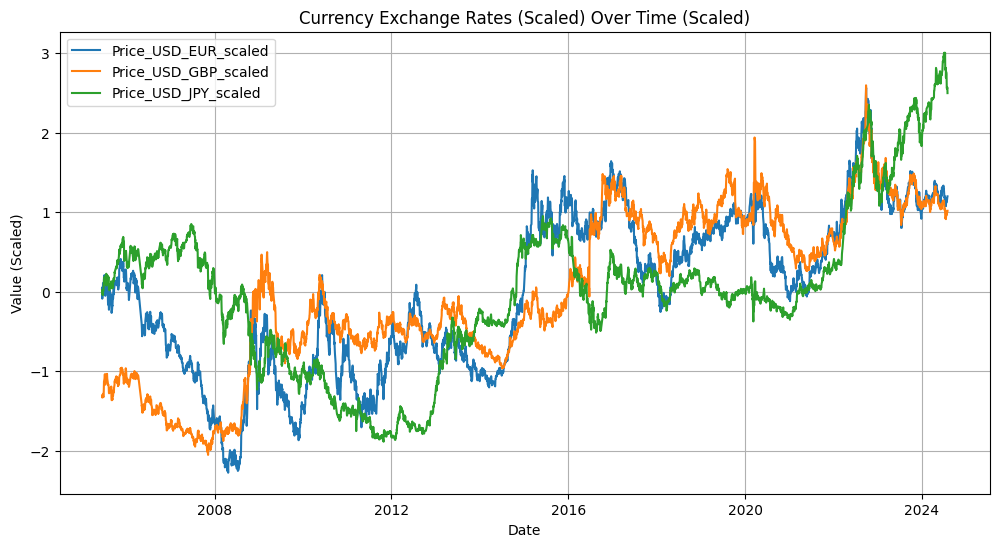

In [ ]:
# Standardize the values for currency exchange rates
scaler = StandardScaler()
scaled_values = scaler.fit_transform(eda_data[['Price_USD_EUR', 'Price_USD_GBP', 'Price_USD_JPY']])

# Create a new DataFrame for scaled values
scaled_df = pd.DataFrame(scaled_values, columns=['Price_USD_EUR_scaled', 'Price_USD_GBP_scaled', 'Price_USD_JPY_scaled'])
scaled_df['Date'] = eda_data['Date']

# Grouping the data
groups = {
    "Currency Exchange Rates (Scaled)": ['Price_USD_EUR_scaled', 'Price_USD_GBP_scaled', 'Price_USD_JPY_scaled'],
}

# Plot each group
for group_name, columns in groups.items():
    plt.figure(figsize=(12, 6))
    for col in columns:
        plt.plot(scaled_df['Date'], scaled_df[col], label=col)
    plt.title(f"{group_name} Over Time (Scaled)")
    plt.xlabel('Date')
    plt.ylabel('Value (Scaled)')
    plt.legend()
    plt.grid(True)
    plt.show()


# Interpretation:

The graph appears to be a **time series plot** showing the scaled values of three currency exchange rates over a period from approximately 2006 to 2024. The exchange rates are:

- **Price_USD_EUR_scaled** (USD to EUR)
- **Price_USD_GBP_scaled** (USD to GBP)
- **Price_USD_JPY_scaled** (USD to JPY)

## Observations:
- **Volatility**: All three exchange rates exhibit significant fluctuations over the time period shown, indicating that currency exchange rates are highly volatile.
- **Relative Movements**: The lines intersect and move in different directions at various points, suggesting that the relative values of these currencies against the US Dollar have changed considerably over time.
- **Specific Observations**:
  - **USD_EUR**: Shows a general downward trend, suggesting that the Euro has appreciated against the US Dollar over this period.
  - **USD_GBP**: Exhibits more volatility with periods of appreciation and depreciation against the US Dollar.
  - **USD_JPY**: Shows a more pronounced downward trend than USD_EUR, indicating that the Japanese Yen has appreciated more against the US Dollar.

## Possible Inferences:
- **Currency Dynamics**: The graph illustrates the dynamic nature of currency exchange rates, highlighting their sensitivity to various economic and geopolitical factors.
- **Investment Implications**: Investors and traders can use this information to make informed decisions regarding currency investments and hedging strategies.
- **Economic Analysis**: The movements in these exchange rates can provide insights into the relative economic strengths and weaknesses of the countries involved.

## Additional Considerations:
- **Scaling**: The values are scaled, which means that the actual exchange rates are not directly represented. This scaling is likely done for better visualization and comparison.


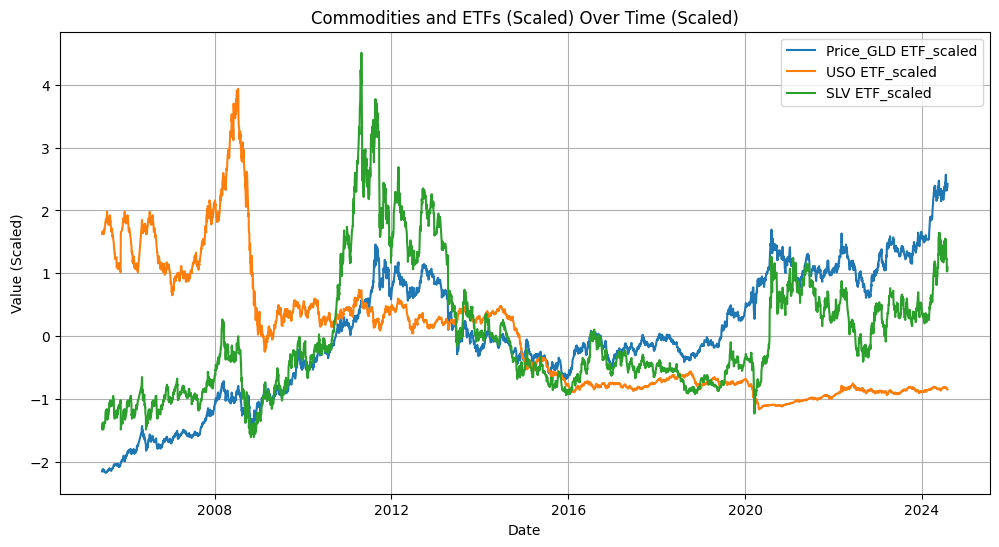

In [ ]:
# Standardize the values for commodities and ETFs
scaler = StandardScaler()
scaled_values = scaler.fit_transform(eda_data[['Price_GLD ETF', 'USO ETF', 'SLV ETF']])

# Create a new DataFrame for scaled values
scaled_df = pd.DataFrame(scaled_values, columns=['Price_GLD ETF_scaled', 'USO ETF_scaled', 'SLV ETF_scaled'])
scaled_df['Date'] = eda_data['Date']

# Grouping the data
groups = {
    "Commodities and ETFs (Scaled)": ['Price_GLD ETF_scaled', 'USO ETF_scaled', 'SLV ETF_scaled'],
}

# Plot each group
for group_name, columns in groups.items():
    plt.figure(figsize=(12, 6))
    for col in columns:
        plt.plot(scaled_df['Date'], scaled_df[col], label=col)
    plt.title(f"{group_name} Over Time (Scaled)")
    plt.xlabel('Date')
    plt.ylabel('Value (Scaled)')
    plt.legend()
    plt.grid(True)
    plt.show()


# Interpretation:

The graph appears to be a **time series plot** showing the scaled values of three commodity ETFs over a period from approximately 2006 to 2024. The ETFs are:

- **Price_GLD ETF_scaled** (Gold ETF)
- **USO ETF_scaled** (Oil ETF)
- **SLV ETF_scaled** (Silver ETF)

## Observations:
- **Volatility**: All three ETFs exhibit significant fluctuations over the time period shown, indicating that commodity prices are highly volatile.
- **Relative Movements**: The lines intersect and move in different directions at various points, suggesting that the relative values of these commodities have changed considerably over time.
- **Specific Observations**:
  - **GLD ETF**: Shows a general upward trend with periods of significant price increases and declines.
  - **USO ETF**: Exhibits high volatility with periods of sharp price increases and declines, particularly around 2008 and 2020.
  - **SLV ETF**: Shows a similar pattern to GLD ETF, with periods of upward and downward trends.

## Possible Inferences:
- **Commodity Price Dynamics**: The graph illustrates the dynamic nature of commodity prices, highlighting their sensitivity to various economic, geopolitical, and supply/demand factors.


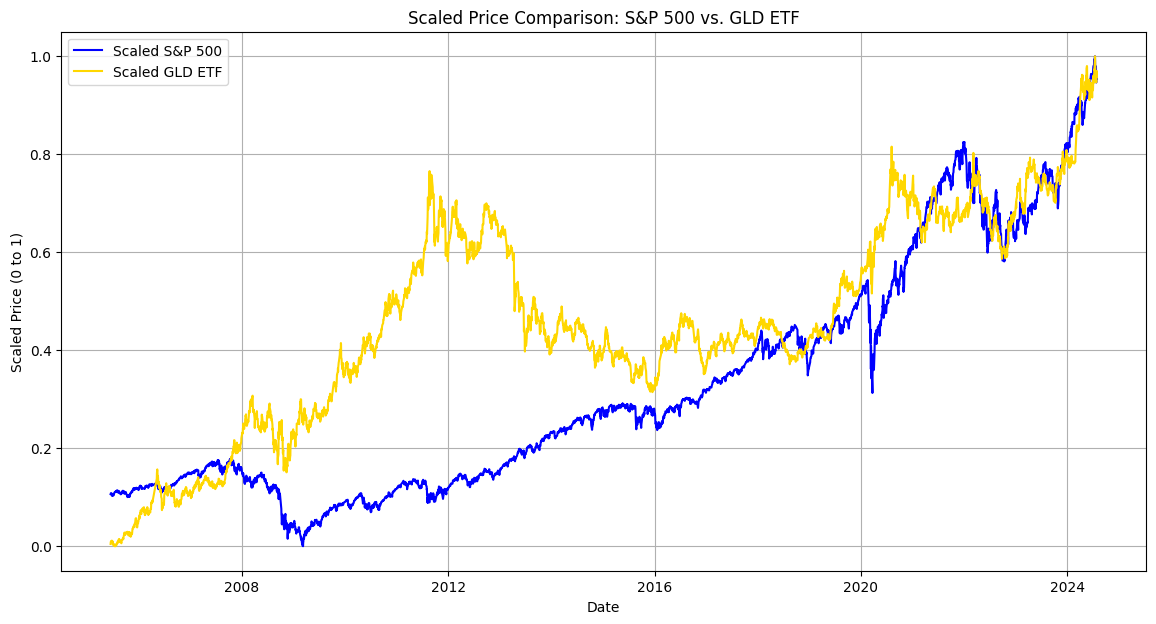

In [ ]:
# Select the columns to scale
scaling_data = eda_data[['Price_S&P 500', 'Price_GLD ETF']]

# Apply MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(scaling_data)

# Create a new DataFrame for scaled values
scaled_df = pd.DataFrame(scaled_values, columns=['Scaled_S&P 500', 'Scaled_GLD ETF'])
scaled_df['Date'] = eda_data['Date']

# Plot the scaled features
plt.figure(figsize=(14, 7))

# Plot scaled S&P 500
plt.plot(scaled_df['Date'], scaled_df['Scaled_S&P 500'], label='Scaled S&P 500', color='blue')

# Plot scaled GLD ETF
plt.plot(scaled_df['Date'], scaled_df['Scaled_GLD ETF'], label='Scaled GLD ETF', color='gold')

# Add titles and labels
plt.title('Scaled Price Comparison: S&P 500 vs. GLD ETF')
plt.xlabel('Date')
plt.ylabel('Scaled Price (0 to 1)')
plt.legend()
plt.grid(True)
plt.show()



# Interpretation:

The graph presents a comparison of the scaled prices of the **S&P 500** and the **GLD ETF** over a period from approximately 2006 to 2024.

## Observations:
- **Overall Trend**: Both the S&P 500 and GLD ETF exhibit an upward trend over the time period shown, indicating that both the stock market and gold prices have generally increased.
- **Relative Performance**:
  - The **S&P 500** line shows a stronger and more consistent upward trend compared to the **GLD ETF** line. This suggests that the S&P 500 has generally outperformed gold in terms of price appreciation during this period.
  - The **GLD ETF** line shows more volatility and periods of flat or declining prices, particularly during the 2011-2015 timeframe.
- **Divergence**: The lines diverge significantly at certain points, indicating that their prices have moved in different directions. For example, the GLD ETF price increased while the S&P 500 price remained relatively flat during the 2011-2012 period.

## Possible Inferences:
- **Asset Allocation**: The graph highlights the potential benefits of diversifying an investment portfolio with both stocks (represented by the S&P 500) and gold (represented by the GLD ETF). Gold can act as a hedge against stock market declines, as its price tends to rise when stock prices fall.
- **Market Sentiment**: The relative performance of gold and stocks can reflect investor sentiment and expectations about economic growth and inflation.
- **Economic Conditions**: Periods of economic uncertainty or inflation often lead to increased demand for gold, which can push up its price relative to stocks.

## Additional Considerations:
- **Scaling**: The values are scaled, which means that the actual prices of the S&P 500 and GLD ETF are not directly represented. This scaling is likely done for better visualization and comparison.


<ipython-input-29-7f721f22b3b1>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Price_GLD_Range', y='Vol_GLD ETF', data=eda_data, palette='coolwarm')


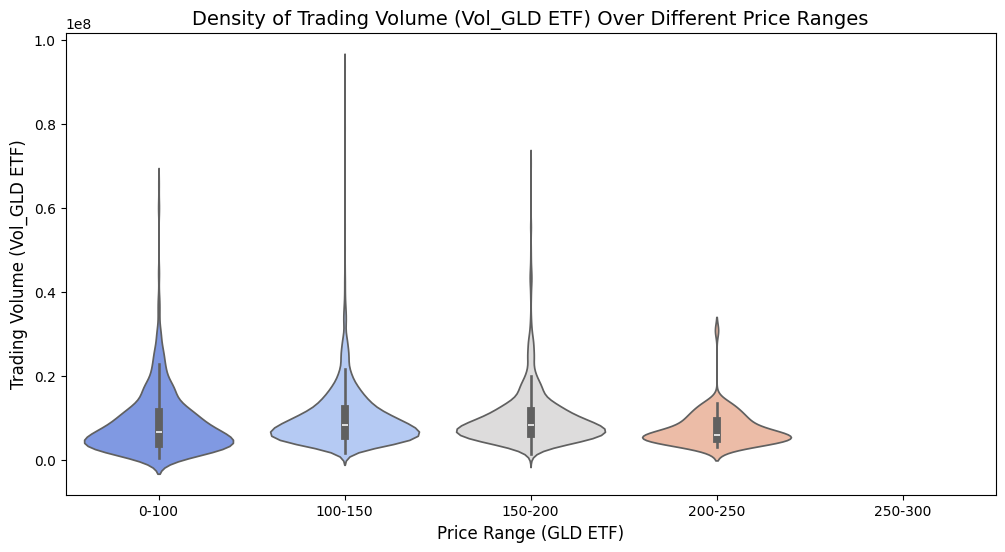

In [ ]:
# Creating a new column for price range categories
eda_data['Price_GLD_Range'] = pd.cut(eda_data['Price_GLD ETF'], bins=[0, 100, 150, 200, 250, 300],
                                     labels=['0-100', '100-150', '150-200', '200-250', '250-300'])

# Plot the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Price_GLD_Range', y='Vol_GLD ETF', data=eda_data, palette='coolwarm')

# Add titles and labels
plt.title('Density of Trading Volume (Vol_GLD ETF) Over Different Price Ranges', fontsize=14)
plt.xlabel('Price Range (GLD ETF)', fontsize=12)
plt.ylabel('Trading Volume (Vol_GLD ETF)', fontsize=12)

# Show the plot
plt.show()


# Interpretation:

The plot visualizes the relationship between the trading volume (**Vol_GLD ETF**) and different price ranges of the GLD ETF.

## Key Components:
- **Violin Shape**: Each violin plot represents the distribution of trading volume within a specific price range. The width of the violin at a particular point indicates the density of observations at that value.
- **Price Ranges**: The x-axis is divided into different price ranges of the GLD ETF.
- **Trading Volume**: The y-axis represents the trading volume (**Vol_GLD ETF**).

## Observations:
- **Price Range 0-100**: The violin plot for this range is relatively narrow, suggesting that the distribution of trading volume is less spread out compared to the other ranges.
- **Price Range 100-150**: This range shows a wider violin plot, indicating a greater spread in trading volume.
- **Price Range 150-200**: The violin plot is wider than 0-100 but narrower than 100-150, suggesting an intermediate spread in trading volume.
- **Price Range 200-250**: Similar to 150-200, this range shows a moderate spread in trading volume.
- **Price Range 250-300**: The violin plot is relatively narrow, similar to 0-100, indicating a less spread out distribution of trading volume.

## Inferences:
- **Trading Volume and Price**: The plot suggests that there might be some relationship between trading volume and the price range of the GLD ETF. However, the exact nature of this relationship is not immediately clear.
- **Price Range 100-150**: This price range appears to have the highest variability in trading volume.
- **Price Ranges 0-100 and 250-300**: These ranges seem to have lower trading volume compared to the middle price ranges.

## Additional Considerations:
- **Scaling**: Ensure that the scaling of the axes appropriately represents the distribution and variability in trading volume across different price ranges.


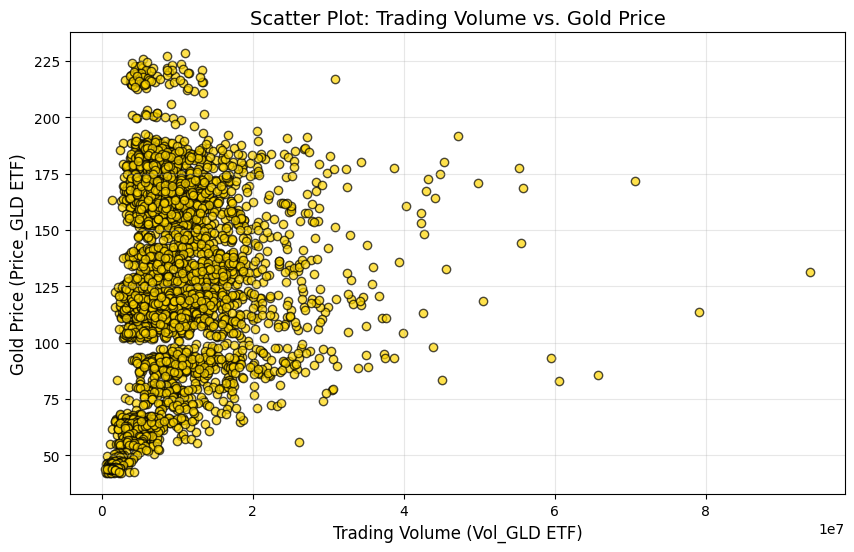

In [ ]:
# Scatter plot for Trading Volume vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(eda_data['Vol_GLD ETF'], eda_data['Price_GLD ETF'], alpha=0.7, c='gold', edgecolor='black')

# Add titles and labels
plt.title('Scatter Plot: Trading Volume vs. Gold Price', fontsize=14)
plt.xlabel('Trading Volume (Vol_GLD ETF)', fontsize=12)
plt.ylabel('Gold Price (Price_GLD ETF)', fontsize=12)

# Enhance the plot with grid
plt.grid(alpha=0.3)
plt.show()



# Interpretation:

The plot visualizes the relationship between the trading volume (**Vol_GLD ETF**) and the gold price (**Price_GLD ETF**).

## Observations:
- **Positive Correlation**: There appears to be a weak positive correlation between trading volume and gold price. This suggests that as the gold price increases, trading volume tends to increase as well. However, the relationship is not very strong.
- **Clustering**: The data points are clustered in certain regions of the plot. There is a dense cluster of points in the lower-left region, indicating that a significant portion of the data has lower gold prices and lower trading volumes.
- **Outliers**: There are a few data points scattered away from the main cluster. These could be considered outliers, representing unusual combinations of gold price and trading volume.

## Inferences:
- The weak positive correlation suggests that while there might be some relationship between gold price and trading volume, other factors could be influencing trading volume independently of the gold price.
- The clustering in the lower-left region indicates that lower gold prices are often associated with lower trading volumes, while higher prices tend to attract more trading activity.
- Outliers could indicate periods of market events or sudden price movements that disrupt the typical relationship between price and volume.


<a name="model-analysis"></a>
## **MODEL: BUILDING, TRAINING & HYPOTHESIS TESTING**





In [3]:

df = pd.read_csv("/Users/vikaspatel/Desktop/Data science/DATA 602/EDA exported_data.csv")


In [4]:
df['Date'] = pd.to_datetime(df['Date']) # Convert 'Date' column to datetime objects if it's not already
df = df.sort_values(by='Date', ascending=True)
df.head()

,Date,Price_GLD ETF,Vol_GLD ETF,Price_DAX,Price_USD_EUR,Price_Nikkei 225,Price_USD_GBP,Price_Shanghai Composite,Price_S&P 500,Price_USD_JPY,S&P GSCI Crude Oil Index,USO ETF,SLV ETF
4200,2005-06-15,42.74,2310000,4548.42,0.8250,11415.88,0.5487,1072.84,1206.6,109.19,1048.03,524.32,9.95
4199,2005-06-16,43.46,1810000,4579.87,0.8259,11416.38,0.5487,1086.01,1211.0,108.89,1066.98,521.44,9.62
4198,2005-06-17,43.63,1820000,4604.57,0.8138,11514.03,0.5461,1085.61,1217.0,108.50,1099.49,526.32,9.67
4197,2005-06-20,43.66,1430000,4586.86,0.8233,11483.35,0.5480,1115.62,1216.1,109.27,1112.50,529.28,10.26
4196,2005-06-21,43.81,672600,4608.11,0.8212,11488.74,0.5467,1101.49,1213.6,108.16,1096.89,530.00,10.29


In [5]:
df = df.reset_index(drop=True)

In [6]:
df.tail()

,Date,Price_GLD ETF,Vol_GLD ETF,Price_DAX,Price_USD_EUR,Price_Nikkei 225,Price_USD_GBP,Price_Shanghai Composite,Price_S&P 500,Price_USD_JPY,S&P GSCI Crude Oil Index,USO ETF,SLV ETF
4196,2024-07-24,221.80,6840000,18387.46,0.9223,39154.85,0.7747,2901.95,5427.13,153.87,149.70,76.81,26.43
4197,2024-07-25,218.33,9780000,18298.72,0.9218,37869.51,0.7781,2886.74,5399.22,153.93,151.04,77.46,25.41
4198,2024-07-26,220.63,6330000,18417.55,0.9208,37667.41,0.7769,2890.90,5459.10,153.72,148.88,76.11,25.48
4199,2024-07-29,220.32,4670000,18320.67,0.9240,38468.63,0.7774,2891.85,5463.54,154.01,146.27,75.19,25.44
4200,2024-07-30,222.52,4940000,18411.18,0.9246,38525.95,0.7790,2879.30,5436.44,152.76,144.19,74.46,25.83


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4201 entries, 0 to 4200
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Date                      4201 non-null   datetime64[ns]
 1   Price_GLD ETF             4201 non-null   float64       
 2   Vol_GLD ETF               4201 non-null   int64         
 3   Price_DAX                 4201 non-null   float64       
 4   Price_USD_EUR             4201 non-null   float64       
 5   Price_Nikkei 225          4201 non-null   float64       
 6   Price_USD_GBP             4201 non-null   float64       
 7   Price_Shanghai Composite  4201 non-null   float64       
 8   Price_S&P 500             4201 non-null   float64       
 9   Price_USD_JPY             4201 non-null   float64       
 10  S&P GSCI Crude Oil Index  4201 non-null   float64       
 11  USO ETF                   4201 non-null   float64       
 12  SLV ETF             

In [22]:
# Define features (independent variables) and target variable
X = df.drop(columns=['Price_GLD ETF', 'Date'])  # Exclude target and date
y = df['Price_GLD ETF']

# Add a constant to the independent variables
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) model
model = sm.OLS(y, X).fit()

# Get the p-values
p_values = model.pvalues

# Print the summary of the model (includes p-values)
print(model.summary())

# Or if you just want to view the p-values:
print("\nP-values for the features:\n", p_values)


                            OLS Regression Results                            
Dep. Variable:          Price_GLD ETF   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     6846.
Date:                Tue, 10 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:26:35   Log-Likelihood:                -15202.
No. Observations:                4201   AIC:                         3.043e+04
Df Residuals:                    4189   BIC:                         3.050e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

### Interpretation of Results

#### General Overview:
1. **P-Value Threshold**:
   - A **p-value < 0.05** indicates that the feature is statistically significant in predicting the target variable (`Price_GLD ETF`).
   - Features with p-values ≥ 0.05 are not statistically significant and may not have a meaningful relationship with the target variable in the context of this model.

2. **Condition Number Warning**:
   - The **condition number is large (4.59e+08)**, indicating potential **multicollinearity** or other numerical instability. This means that some features might be highly correlated, which can distort the model's estimates and p-values.

---

#### Feature-by-Feature Analysis:

| **Feature**                     | **P-Value**              | **Significance**         | **Interpretation**                                                                                             |
|----------------------------------|--------------------------|--------------------------|----------------------------------------------------------------------------------------------------------------|
| **const**                        | `2.828130e-01` (0.2828)  | Not Significant          | The intercept is not statistically significant, suggesting that the model's baseline prediction may not be meaningful. |
| **Vol_GLD ETF**                  | `1.242793e-21` (≈ 0)     | Highly Significant       | Volume of GLD ETF is a key predictor, meaning changes in trading volume strongly relate to `Price_GLD ETF`.         |
| **Price_DAX**                    | `1.657730e-01` (0.1658)  | Not Significant          | Price of the DAX index does not significantly affect the `Price_GLD ETF` in this model.                            |
| **Price_USD_EUR**                | `6.571962e-14` (≈ 0)     | Highly Significant       | Exchange rate of USD to EUR has a strong relationship with `Price_GLD ETF`.                                       |
| **Price_Nikkei 225**             | `5.112811e-60` (≈ 0)     | Highly Significant       | Price of Nikkei 225 index strongly impacts `Price_GLD ETF`, indicating a robust relationship.                      |
| **Price_USD_GBP**                | `7.255894e-64` (≈ 0)     | Highly Significant       | Exchange rate of USD to GBP is a strong predictor of `Price_GLD ETF`.                                            |
| **Price_Shanghai Composite**     | `3.770679e-03` (0.0038)  | Significant              | Price of the Shanghai Composite index has a statistically significant effect on `Price_GLD ETF`.                  |
| **Price_S&P 500**                | `7.423329e-295` (≈ 0)    | Highly Significant       | Price of S&P 500 index is an extremely strong predictor of `Price_GLD ETF`.                                       |
| **Price_USD_JPY**                | `1.050892e-24` (≈ 0)     | Highly Significant       | Exchange rate of USD to JPY strongly influences `Price_GLD ETF`.                                                 |
| **S&P GSCI Crude Oil Index**     | `1.603293e-109` (≈ 0)    | Highly Significant       | The crude oil index has a substantial impact on `Price_GLD ETF`, likely reflecting global commodity trends.        |
| **USO ETF**                      | `4.775619e-75` (≈ 0)     | Highly Significant       | The US Oil ETF is a significant predictor, likely due to correlations with commodity prices.                      |
| **SLV ETF**                      | `0.000000e+00` (0.0000)  | Highly Significant       | The SLV ETF (Silver ETF) is extremely significant, indicating a very strong relationship with `Price_GLD ETF`.     |

---

#### Key Observations:
1. **Significant Predictors**:
   - Features like **Vol_GLD ETF**, **Price_S&P 500**, **S&P GSCI Crude Oil Index**, and **SLV ETF** have extremely low p-values, indicating they are crucial for predicting `Price_GLD ETF`.

2. **Insignificant Predictors**:
   - Features like **Price_DAX** (p = 0.1658) and **const** (p = 0.2828) are not statistically significant, suggesting they might not contribute much to the prediction of `Price_GLD ETF`.

3. **Multicollinearity**:
   - The large condition number suggests that some features are highly correlated, which can lead to inflated standard errors and unreliable coefficients. Techniques like **Variance Inflation Factor (VIF)** analysis or feature selection should be considered.

4. **Global Indicators**:
   - Many significant features are global financial indicators (e.g., **Price_Nikkei 225**, **Price_S&P 500**, **Price_USD_JPY**), highlighting the influence of macroeconomic factors on the `Price_GLD ETF`.



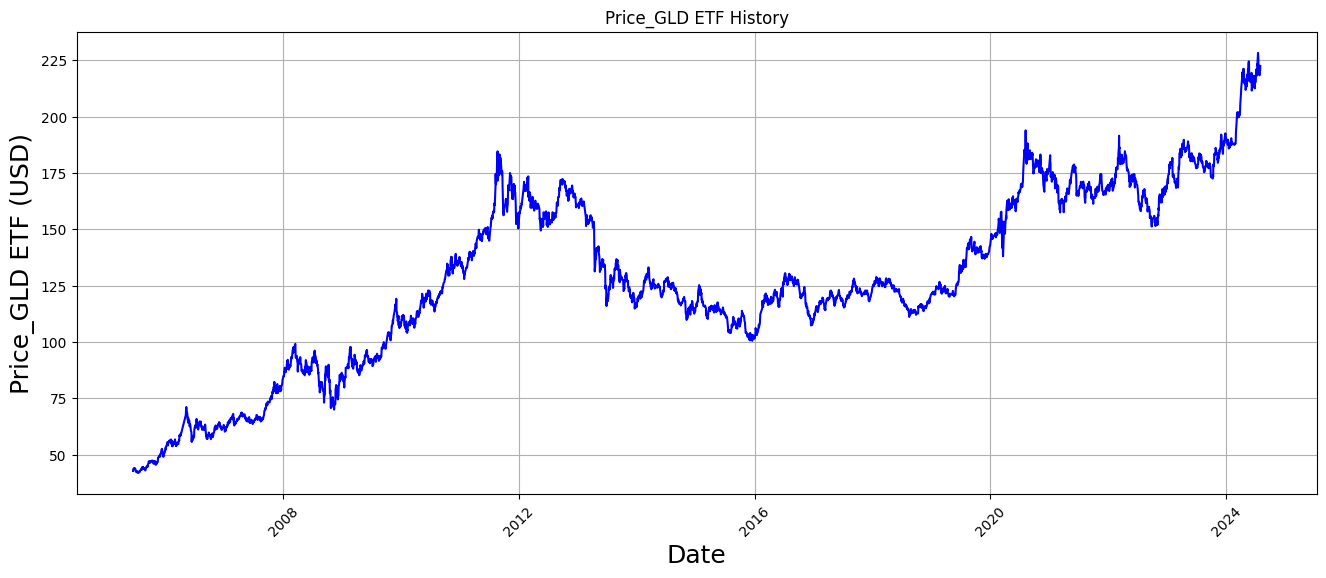

In [8]:
# Convert 'Date' column to datetime if not already
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the data
plt.figure(figsize=(16, 6))
plt.title('Price_GLD ETF History')
plt.plot(df['Date'], df['Price_GLD ETF'], label='Price_GLD ETF', color='blue')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price_GLD ETF (USD)', fontsize=18)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.show()

In [9]:
# Filter the dataframe for the 'Price_GLD ETF' column
data = df.filter(['Price_GLD ETF'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on (80% of the dataset)
training_data_len = int(np.ceil(len(dataset) * 0.80))

# Display the length of the training data
training_data_len

3361

In [10]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00456009],
       [0.00842275],
       [0.00933476],
       ...,
       [0.95890558],
       [0.95724249],
       [0.96904506]])

In [11]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shap

[array([4.56008584e-03, 8.42274678e-03, 9.33476395e-03, 9.49570815e-03,
       1.03004292e-02, 9.81759657e-03, 1.14270386e-02, 1.07832618e-02,
       1.08369099e-02, 8.36909871e-03, 9.33476395e-03, 8.31545064e-03,
       4.34549356e-03, 2.09227468e-03, 1.93133047e-03, 2.52145923e-03,
       1.98497854e-03, 3.48712446e-03, 4.02360515e-03, 2.46781116e-03,
       5.36480687e-05, 0.00000000e+00, 1.66309013e-03, 3.05793991e-03,
       3.00429185e-03, 3.32618026e-03, 1.93133047e-03, 2.95064378e-03,
       4.61373391e-03, 4.98927039e-03, 6.65236052e-03, 6.70600858e-03,
       8.79828326e-03, 9.60300429e-03, 9.17381974e-03, 7.83261803e-03,
       7.77896996e-03, 9.44206009e-03, 1.37339056e-02, 1.39484979e-02,
       1.20171674e-02, 1.42703863e-02, 1.08369099e-02, 1.04077253e-02,
       9.17381974e-03, 9.71030043e-03, 1.00321888e-02, 9.12017167e-03,
       9.87124464e-03, 9.22746781e-03, 9.01287554e-03, 6.00858369e-03,
       8.10085837e-03, 1.25000000e-02, 1.26609442e-02, 1.27682403e-02,
     

In [12]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

/usr/local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3301/3301 ━━━━━━━━━━━━━━━━━━━━ 98s 29ms/step - loss: 0.0017


In [13]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step


6.839372056108828

/var/folders/4_/r514jjwd3jvbmt5t3cynmg080000gn/T/ipykernel_23668/2928322827.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


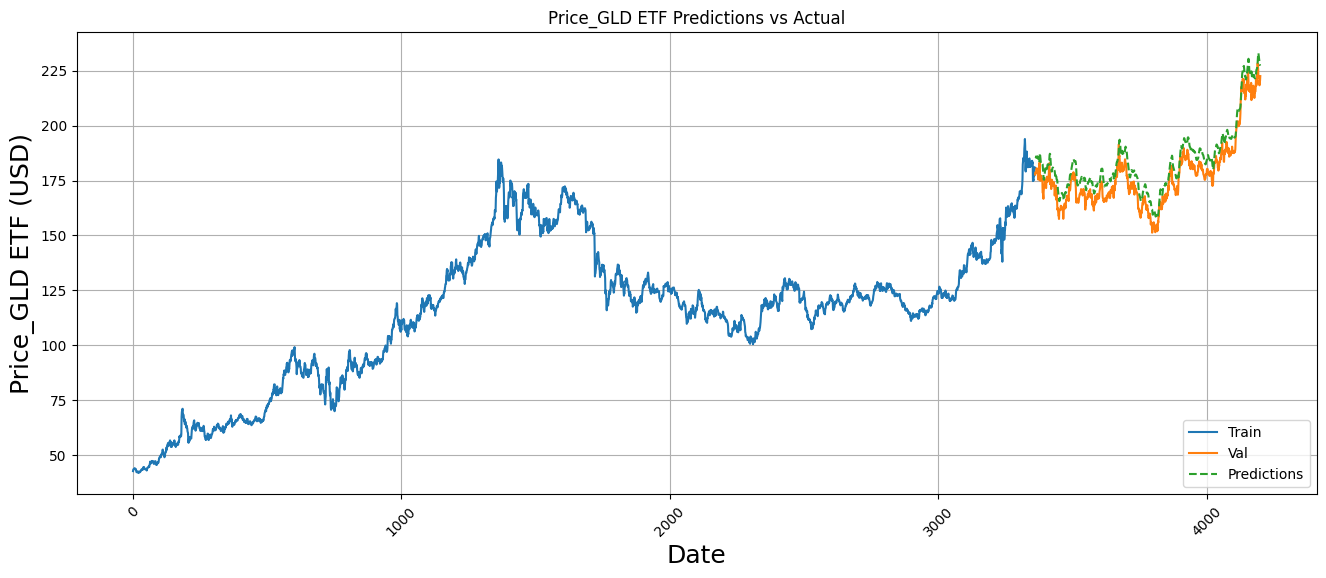

In [14]:
train = data[:training_data_len]
valid = data[training_data_len:]


valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Price_GLD ETF Predictions vs Actual')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Price_GLD ETF (USD)', fontsize=18)
plt.plot(train['Price_GLD ETF'], label='Train')  # Plot train data
plt.plot(valid['Price_GLD ETF'], label='Val')  # Plot actual validation data
plt.plot(valid['Predictions'], label='Predictions', linestyle='--')  # Plot predictions
plt.legend(loc='lower right')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.show()


In [15]:
# Show the valid and predicted prices
valid

,Price_GLD ETF,Predictions
3361,177.72,185.970825
3362,178.27,185.931305
3363,178.92,185.707199
3364,178.30,185.631165
3365,178.39,185.431122
...,...,...
4196,221.80,229.904465
4197,218.33,229.298889
4198,220.63,227.915161
4199,220.32,227.440002


In [16]:
actual = valid['Price_GLD ETF']
predictions = valid['Predictions']

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual, predictions)
print(f'Mean Absolute Error (MAE): {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(actual, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 6.4739194510323665
Mean Squared Error (MSE): 46.77701012188229
Root Mean Squared Error (RMSE): 6.839372056108828


In [17]:
# Defining the threshold (5% in this case)
threshold = 0.05

# Calculate the accuracy based on the percentage difference
accuracy = np.mean(np.abs((actual - predictions) / actual) < threshold)

print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 86.31%


In [18]:
# Calculate R-squared (R²) for the actual and predicted values
r2 = r2_score(actual, predictions)
print(f'R-squared (R²): {r2}')

R-squared (R²): 0.8082518052518624


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 128)        │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)


<a name="interpretation"></a>
## **INTERPRETATION: INSIGHT & CONCLUSION**



#### Volatility and Distribution:
- The GLD ETF exhibits higher volatility and skewed distributions in both price and trading volume compared to equity indices.
- Equity indices, like the S&P 500, tend to show lower long-term volatility, though they can experience short-term fluctuations.

#### Price Dynamics:
- GLD has shown an upward price trend with fluctuations, while the S&P 500 exhibits a stronger and more consistent upward trend over the same period.
- There is evidence of a weak positive correlation between gold price and trading volume.

#### Relationships with Other Markets:
- GLD has varying correlations with equity indices (e.g., DAX, Nikkei 225, S&P 500), currencies (e.g., USD_EUR, USD_GBP), and commodities (e.g., USO, SLV).
- The S&P 500 generally outperforms GLD in terms of price appreciation over the analyzed period.

#### Inflation Hedge:
- GLD is historically known as a hedge against inflation, benefiting during periods of rising prices.
- Equity indices respond more variably to inflation, depending on the sectors and companies involved.

#### Diversification Benefits:
- GLD provides diversification due to its low or negative correlation with equity markets, acting as a hedge during stock market downturns.
- Equity indices are more inter-correlated, leading to simultaneous downturns in times of market stress.

#### Observations from Visual Analysis:
- The KDE plot of GLD's trading volume shows a skewed distribution with concentration at lower values.
- A violin plot highlights higher trading volumes in certain price ranges.
- The correlation matrix revealed distinct relationships between GLD and other financial instruments.
- Scatter plots suggest only a weak positive relationship between trading volume and gold price.

#### Investment Implications:
- Long-term investors may favor equity indices for higher returns despite greater risk.
- Risk-averse investors might include GLD for its diversification and inflation protection benefits.
- GLD’s higher volatility makes it more suitable for shorter-term strategies or as a hedge.

#### Key Considerations:
- Past performance is not indicative of future results for either GLD or equity indices.
- Economic and geopolitical factors can significantly impact both asset classes.
- Portfolio allocation should align with individual risk tolerance, goals, and financial circumstances.


## Model Conclusion

#### Model Performance:
- **Mean Absolute Error (MAE)**: 6.47
- **Mean Squared Error (MSE)**: 46.78
- **Root Mean Squared Error (RMSE)**: 6.84
- **Accuracy**: 86.31% (based on a 5% threshold between actual and predicted values)
- **R-squared (R²)**: 0.808, indicating that 80.8% of the variance in the target variable (Price_GLD ETF) is explained by the model.

#### Model Architecture:
- Two LSTM layers (128 units, 64 units) for capturing sequential patterns.
- Two Dense layers (25 units, 1 output unit) for prediction.
- **Total trainable parameters**: 117,619.
- The sequential model is suitable for time-series prediction, with LSTM layers effectively handling sequential data.


The model provides predictions for the `Price_GLD ETF` based on the given features, but it's important to recognize that gold prices are influenced by several additional factors that this analysis does not consider. Gold prices are highly sensitive to a variety of macroeconomic and geopolitical variables, including:

- **Inflation Rates**: Gold is often used as a hedge against inflation, so fluctuations in global inflation can significantly impact gold prices.
- **Interest Rates**: Higher interest rates tend to make gold less attractive, while lower rates generally increase demand for gold.
- **Global Economic Stability**: Economic crises or recessions drive demand for gold as a safe-haven asset, pushing prices higher.
- **Geopolitical Events**: Wars, political instability, and other geopolitical issues often cause an increase in gold prices due to its safe-haven nature.
- **Currency Strength**: A weaker U.S. dollar typically leads to higher gold prices.
- **Supply and Demand**: Mining production, technological advancements, and demand from major gold-consuming countries like India and China play a significant role in price fluctuations.
- **Speculation and Market Sentiment**: Investor behavior and speculative trading can have a large impact on short-term gold price movements.
- **Government and Central Bank Actions**: Central bank decisions, such as buying or selling gold reserves, can influence global gold prices.

### Disclaimer :
The model's predictions are based on the assumption of a stable economy and rely on historical patterns and selected features, without considering the broader economic or geopolitical disruptions that can influence the market. In reality, both macro and microeconomic conditions are unpredictable, and events such as recessions, pandemics, or trade wars can significantly disrupt these patterns. While the model is useful for predicting gold prices under stable conditions, its reliability may decrease in volatile environments. Incorporating additional indicators, such as macroeconomic data and news sentiment, could enhance its accuracy and provide a more comprehensive understanding of the factors influencing gold prices.
